# `线性回归`

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

%matplotlib inline

# `1.1)单变量线性回归`

In [28]:
data = np.loadtxt('data.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

#### `1.1.1)损失函数`

In [29]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    
    h = X.dot(theta)
    
    J = 1.0/(2*m)*(np.sum(np.square(h-y)))
    
    return J

In [30]:
computeCost(X,y)

32.072733877455676

#### `1.1.2)梯度下降`

In [31]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        J_history[iter] = computeCost(X, y, theta)
        
        h = X.dot(theta)
        theta = theta - alpha*(1.0/m)*(X.T.dot(h-y))
    
    return(theta, J_history)

array([[-3.63029144],
       [ 1.16636235]])

array([32.07273388,  6.73719046,  5.93159357, ...,  4.4834581 ,
        4.48343473,  4.48341145])

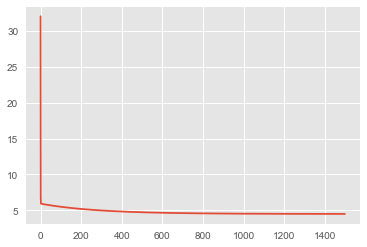

In [32]:
theta, Cost_J = gradientDescent(X, y)
display(theta, Cost_J)
# 画出每一次迭代和损失函数变化
plt.style.use('ggplot')
plt.plot(Cost_J)

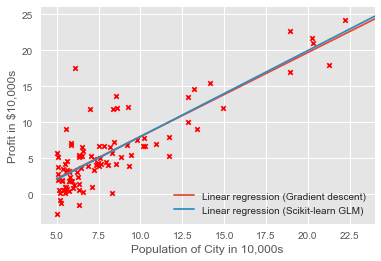

In [33]:
plt.style.use('ggplot')
plt.scatter(X[:,1], y, s=20, c='r', marker='x', linewidths=1)

# 画出线性回归梯度下降得出的函数
xx = np.arange(5, 25)
yy = theta[0] + theta[1] * xx
plt.plot(xx, yy, label='Linear regression (Gradient descent)')

# 和scikit-learn中的线性回归对比一下
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

#### `1.1.3)预测`

In [45]:
print(theta.T.dot([[1], [3.5]]) * 10000)

[[4519.7678677]]
